Run on NERSC

In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits
import healpy as hp
from astropy import wcs

from matplotlib.colors import LogNorm

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [4]:
fn = '/global/u1/d/dstn/legacypipe/py/halo-535126-S14.fits'
fitsio.FITS(fn)


  file: /global/u1/d/dstn/legacypipe/py/halo-535126-S14.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      
  2      IMAGE_HDU       
  3      IMAGE_HDU       

In [41]:
model = fitsio.read(fn, ext=2)
print(model.shape)

img = fitsio.read(fn, ext=3)
print(img.shape)

(1875, 1489)
(1875, 1489)


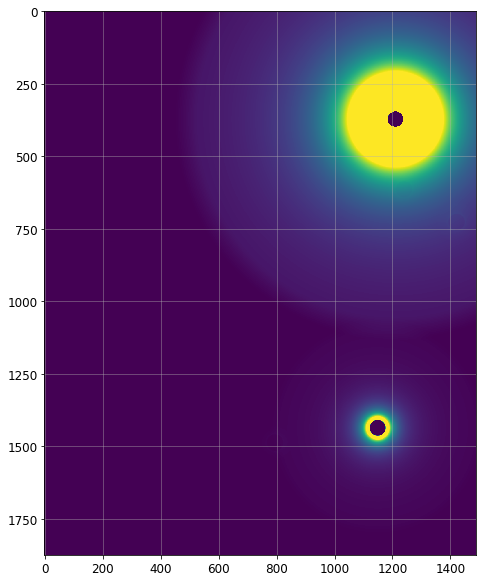

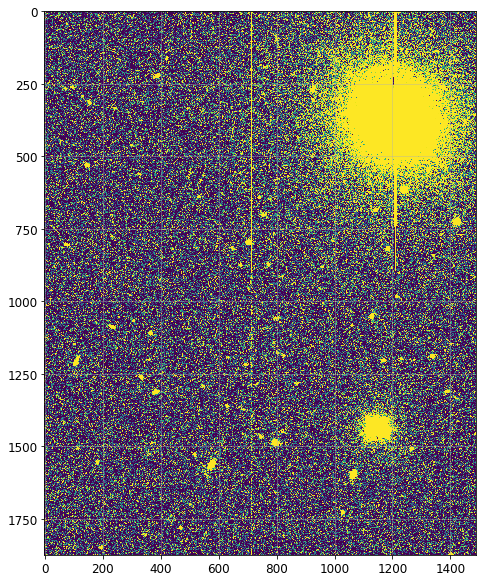

In [10]:
plt.figure(figsize=(10, 10))
plt.imshow(model, vmin=0, vmax=0.01)
plt.grid(alpha=0.5)
plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(img, vmin=0, vmax=0.01)
plt.grid(alpha=0.5)
plt.show()

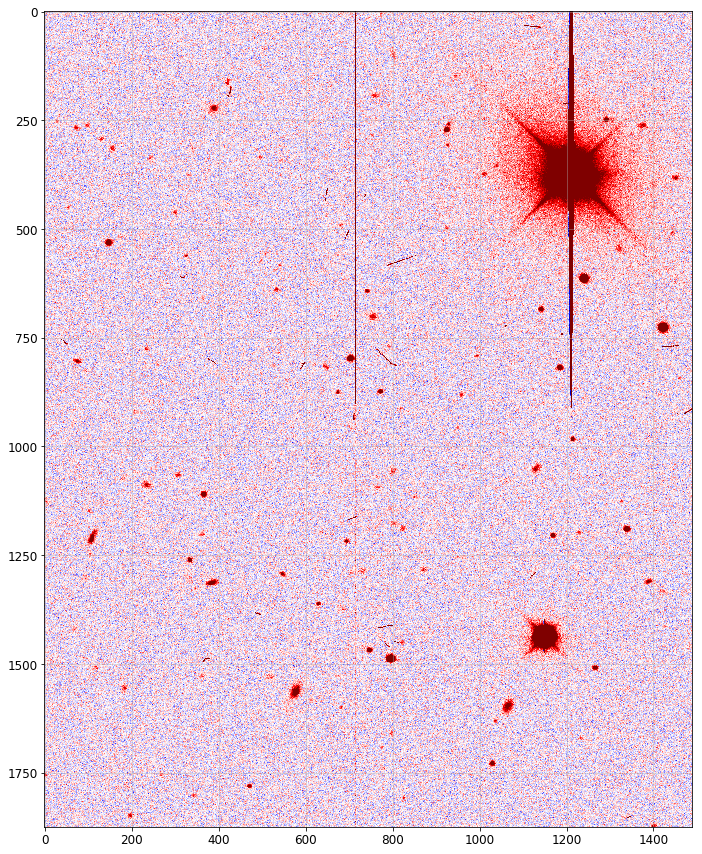

In [19]:
vrange = 0.5e-1
plt.figure(figsize=(15, 15))
plt.imshow(img-model, vmin=-vrange, vmax=vrange, cmap='seismic')
plt.grid(alpha=0.5)
plt.show()

In [43]:
binsize = 7

# trim edges to enable downsizing
# trimmed image size need to be multiples of binsize
img = img[img.shape[0]%binsize:, img.shape[1]%binsize:]
model = model[model.shape[0]%binsize:, model.shape[1]%binsize:]

img = np.mean(np.mean(img.reshape((img.shape[0]//binsize, binsize, img.shape[1]//binsize,-1)), axis=3), axis=1)
model = np.mean(np.mean(model.reshape((model.shape[0]//binsize, binsize, model.shape[1]//binsize,-1)), axis=3), axis=1)

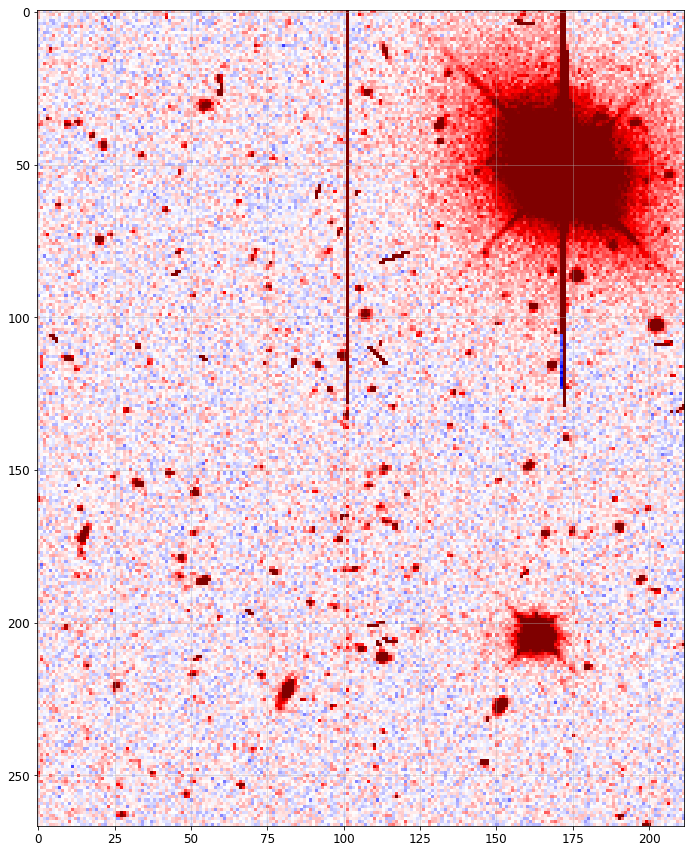

In [44]:
vrange = 0.1e-1
plt.figure(figsize=(15, 15))
plt.imshow(img-model, vmin=-vrange, vmax=vrange, cmap='seismic')
plt.grid(alpha=0.5)
plt.show()

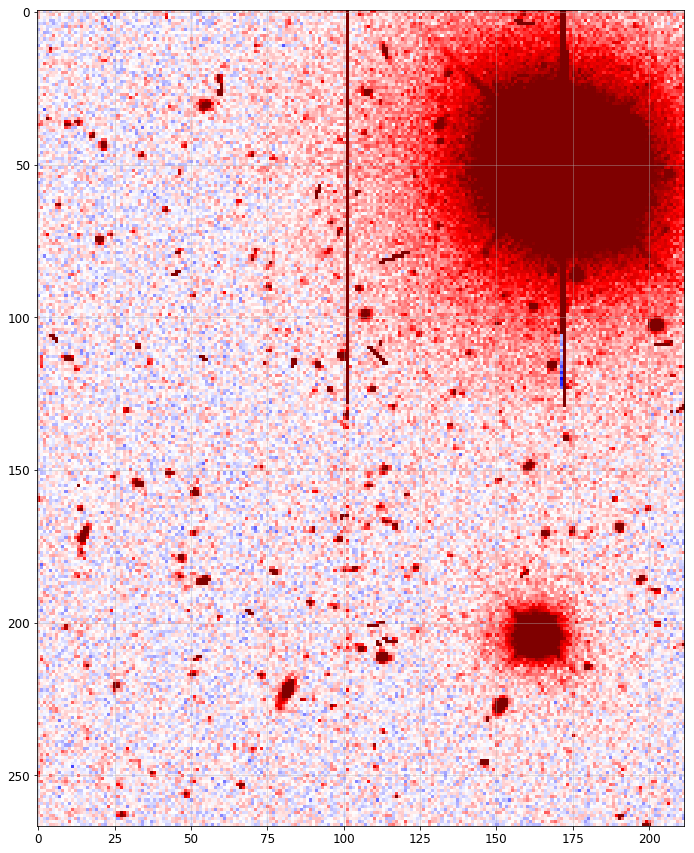

In [45]:
vrange = 0.1e-1
plt.figure(figsize=(15, 15))
plt.imshow(img, vmin=-vrange, vmax=vrange, cmap='seismic')
plt.grid(alpha=0.5)
plt.show()